In [4]:
#import liberies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#import data from csv
data_path= './salaries.csv'

data_salary = pd.read_csv(data_path)

data_salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


#1A

In [6]:
#create a dataframe with the columns needs of 1a.
select_columns=['experience_level','company_size','company_location','salary_in_usd','remote_ratio','work_year']
data_salary_redf = data_salary[select_columns].copy()
data_salary_redf






,experience_level,company_size,company_location,salary_in_usd,remote_ratio,work_year
0,SE,L,US,202800,0,2023
1,SE,L,US,104300,0,2023
2,MI,M,GB,73824,0,2023
3,MI,M,GB,67672,0,2023
4,SE,M,US,290000,0,2023
...,...,...,...,...,...,...
7969,SE,L,US,412000,100,2020
7970,MI,L,US,151000,100,2021
7971,EN,S,US,105000,100,2020
7972,EN,L,US,100000,100,2020


In [7]:
#calculate the employee number by country  and add the avg_salary column to the dataframe
emp_by_country = data_salary_redf['company_location'].value_counts()
emp_by_country = emp_by_country.head()
emp_by_country = emp_by_country.to_frame().rename(columns={'count':'emp_num'})
emp_by_country






,emp_num
company_location,
US,6817
GB,397
CA,181
ES,106
DE,72


In [8]:
#Calculate the avg_salary for each county in the emp_by_country dataframe
avg_salary= data_salary_redf.groupby('company_location')['salary_in_usd'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'salary_in_usd':'avg_salary'})
avg_salary
    




,company_location,avg_salary
0,AD,50745.000000
1,AE,100000.000000
2,AM,50000.000000
3,AR,62000.000000
4,AS,34026.500000
...,...,...
68,TH,22971.333333
69,TR,22313.600000
70,UA,135600.000000
71,US,158694.199061


In [9]:
# merge both df
emp_by_country = emp_by_country.merge(avg_salary,how='left',on='company_location')
emp_by_country

,company_location,emp_num,avg_salary
0,US,6817,158694.199061
1,GB,397,107043.843829
2,CA,181,142539.519337
3,ES,106,56658.179245
4,DE,72,90456.666667


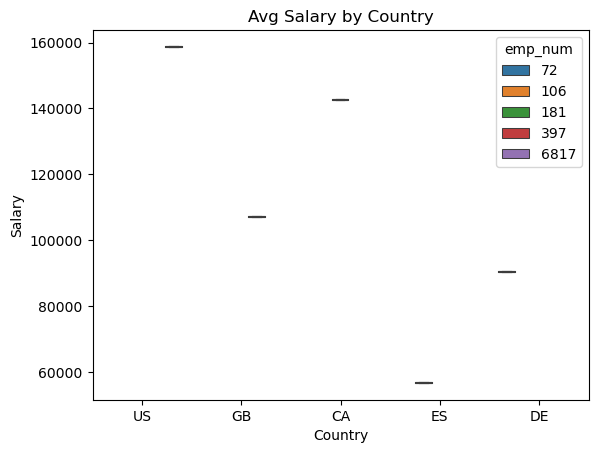

In [10]:
sns.boxplot(x='company_location',y='avg_salary',hue= 'emp_num',data= emp_by_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Avg Salary by Country')
plt.xticks()

plt.show()



In [11]:
salary_by_country = data_salary_redf.merge(emp_by_country,how='inner',on='company_location')
salary_by_country

,experience_level,company_size,company_location,salary_in_usd,remote_ratio,work_year,emp_num,avg_salary
0,SE,L,US,202800,0,2023,6817,158694.199061
1,SE,L,US,104300,0,2023,6817,158694.199061
2,SE,M,US,290000,0,2023,6817,158694.199061
3,SE,M,US,173200,0,2023,6817,158694.199061
4,SE,M,US,235000,100,2023,6817,158694.199061
...,...,...,...,...,...,...,...,...
7568,MI,L,DE,88654,50,2021,72,90456.666667
7569,EN,S,DE,62726,50,2020,72,90456.666667
7570,MI,L,DE,90734,50,2021,72,90456.666667
7571,SE,M,DE,173762,100,2021,72,90456.666667


In [12]:
salary_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7573 entries, 0 to 7572
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  7573 non-null   object 
 1   company_size      7573 non-null   object 
 2   company_location  7573 non-null   object 
 3   salary_in_usd     7573 non-null   int64  
 4   remote_ratio      7573 non-null   int64  
 5   work_year         7573 non-null   int64  
 6   emp_num           7573 non-null   int64  
 7   avg_salary        7573 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 473.4+ KB


In [13]:
salary_by_country.describe()

,salary_in_usd,remote_ratio,work_year,emp_num,avg_salary
count,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000
mean,153523.446587,38.749505,2022.739997,6163.776443,153523.446587
std,61830.236710,48.357133,0.520201,1962.125830,17589.559374
min,15000.000000,0.000000,2020.000000,72.000000,56658.179245
25%,110000.000000,0.000000,2023.000000,6817.000000,158694.199061
50%,145000.000000,0.000000,2023.000000,6817.000000,158694.199061
75%,190000.000000,100.000000,2023.000000,6817.000000,158694.199061
max,450000.000000,100.000000,2023.000000,6817.000000,158694.199061


In [14]:
salary_by_country_mean= salary_by_country.groupby('company_location')['salary_in_usd'].mean()
salary_by_country_mean

company_location
CA    142539.519337
DE     90456.666667
ES     56658.179245
GB    107043.843829
US    158694.199061
Name: salary_in_usd, dtype: float64

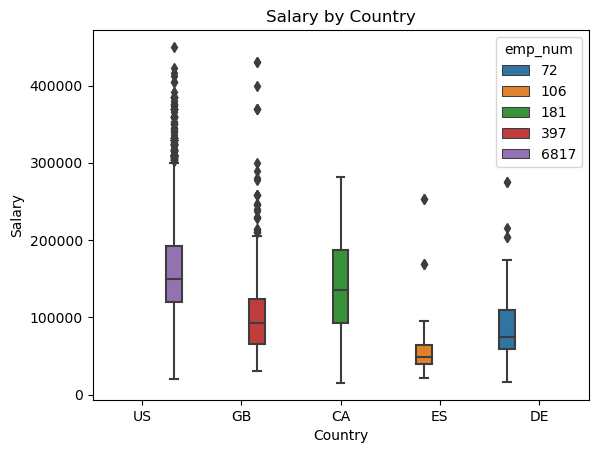

In [9]:
sns.boxplot(x='company_location',y='salary_in_usd',hue= 'emp_num',data= salary_by_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary by Country')
plt.xticks()

plt.show()

#1C

In [10]:
# calculate the avg salary vs remote ratio
avg_salary= data_salary_redf.groupby(['remote_ratio','work_year'])['salary_in_usd'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'salary_in_usd':'avg_salary'})
avg_salary

,remote_ratio,work_year,avg_salary
0,0,2020,94258.111111
1,0,2021,106835.758621
2,0,2022,135076.266573
3,0,2023,160358.056051
4,50,2020,86879.142857
5,50,2021,81311.821918
6,50,2022,84297.524590
7,50,2023,80834.016393
8,100,2020,115214.083333
9,100,2021,109905.275862


In [11]:
# categorized the differents ratios

remote_types= {0:'Remote',
               50:'Hibrid',
               100:'Presential'}

avg_salary['remote_type']= avg_salary['remote_ratio'].map(remote_types)
avg_salary


,remote_ratio,work_year,avg_salary,remote_type
0,0,2020,94258.111111,Remote
1,0,2021,106835.758621,Remote
2,0,2022,135076.266573,Remote
3,0,2023,160358.056051,Remote
4,50,2020,86879.142857,Hibrid
5,50,2021,81311.821918,Hibrid
6,50,2022,84297.524590,Hibrid
7,50,2023,80834.016393,Hibrid
8,100,2020,115214.083333,Presential
9,100,2021,109905.275862,Presential


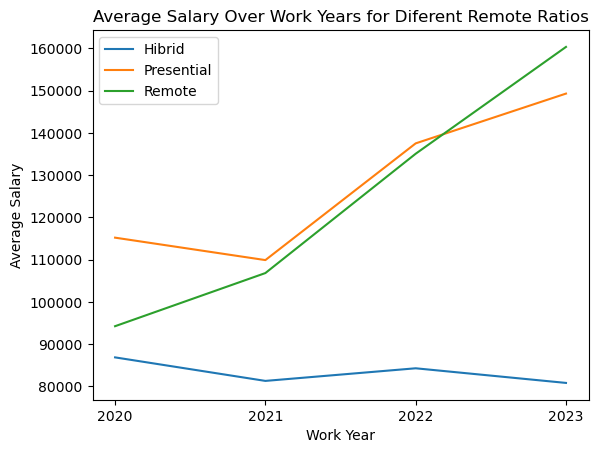

In [12]:
# create bar plot of the avg salary vs remote ratio
for r_type, group in avg_salary.groupby ('remote_type'):
    
    plt.plot(group['work_year'],group['avg_salary'],label=r_type)

plt.xticks(avg_salary['work_year'].unique())
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Over Work Years for Diferent Remote Ratios')
plt.legend()
plt.show()

In [13]:
data_salary = data_salary.rename(columns={
    'work_year':'Year_of_Employment',
    'experience_level':'Experience_Level',
    'employment_type':'Employment_Type',
    'job_title':'Job_Title',
    'salary':'Salary',
    'salary_currency':'Currency',
    'salary_in_usd':'Salary(USD)',
    'employee_residence':'Employee_Ressidence',
    'remote_ratio':'Remote_Status',
    'company_location':'Company_Location',
    'company_size':'Company_Size'})

data_salary

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [14]:
emp_dict = {'FT':'Full_Time',
            'PT':'Part_Time',
            'CT':'Contract',
            'FL':'Freelance'}

data_salary['Employment_Type'] = data_salary['Employment_Type'].replace(emp_dict)
data_salary 

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,Full_Time,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,Full_Time,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,Full_Time,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,Full_Time,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,Full_Time,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,Full_Time,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,Full_Time,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,Full_Time,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [15]:
employment_type = data_salary.set_index(['Employment_Type'])['Salary(USD)']
employment_type

Employment_Type
Full_Time    202800
Full_Time    104300
Full_Time     73824
Full_Time     67672
Full_Time    290000
              ...  
Full_Time    412000
Full_Time    151000
Full_Time    105000
Contract     100000
Full_Time     94665
Name: Salary(USD), Length: 7974, dtype: int64

In [16]:
employment_type_avg = data_salary.groupby(['Employment_Type'])['Salary(USD)'].mean()
employment_type_avg

Employment_Type
Contract     120837.666667
Freelance     54734.363636
Full_Time    149724.790847
Part_Time     52053.153846
Name: Salary(USD), dtype: float64

In [17]:
employment_type_avg = employment_type_avg.sort_values(ascending=True)
employment_type_avg

Employment_Type
Part_Time     52053.153846
Freelance     54734.363636
Contract     120837.666667
Full_Time    149724.790847
Name: Salary(USD), dtype: float64

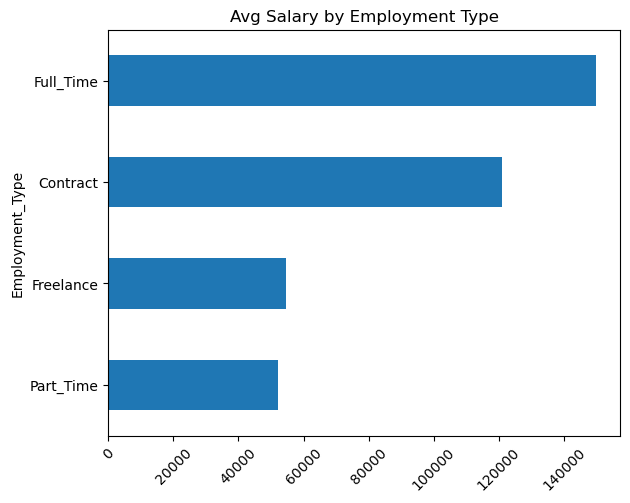

In [18]:
employment_type_avg.plot(kind='barh')


plt.title('Avg Salary by Employment Type')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [19]:
company_size = data_salary.set_index(['Company_Size'])['Salary(USD)']
company_size

Company_Size
L    202800
L    104300
M     73824
M     67672
M    290000
      ...  
L    412000
L    151000
S    105000
L    100000
L     94665
Name: Salary(USD), Length: 7974, dtype: int64

In [20]:
company_size_avg = data_salary.groupby(['Company_Size'])['Salary(USD)'].mean()
company_size_avg

Company_Size
L    133621.020000
M    152336.441334
S     88727.403614
Name: Salary(USD), dtype: float64

In [21]:
company_size_avg = company_size_avg.sort_values(ascending=True)
company_size_avg

Company_Size
S     88727.403614
L    133621.020000
M    152336.441334
Name: Salary(USD), dtype: float64

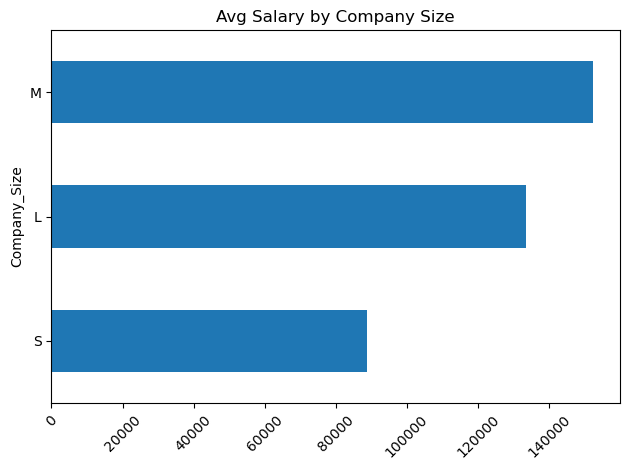

In [22]:
company_size_avg.plot(kind='barh')

plt.title('Avg Salary by Company Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
employment_type_count = data_salary['Employment_Type'].value_counts()
employment_type_count

Employment_Type
Full_Time    7932
Contract       18
Part_Time      13
Freelance      11
Name: count, dtype: int64

In [24]:
company_size_count = data_salary['Company_Size'].value_counts()
company_size_count

Company_Size
M    7108
L     700
S     166
Name: count, dtype: int64